In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

## Significación Estadística y Valores p:


#### Carga de Datos

In [2]:
#Se carga el conjunto de datos
session_times = pd.read_csv(r'./data/web_page_data.csv')



#### Consideraciones

- Se tienen 2 precios, A y B, en un sitio web de comercio electrónico. 
- Se quiere saber si el precio A es realmente mejor en términos de conversión de ventas que el precio B.
- Se tiene una tabla con los resultados de conversiones y no conversiones para ambos precios.

Resultado Precio A 
Conversión 200 
Sin conversión 23739 </br>

Resultado Precio B
Conversión 182 
Sin Conversión 22588    

#### Objetivo

- El código busca evaluar si la diferencia en el tiempo de conversión entre las páginas A y B es estadísticamente significativa. 
- Se utiliza un enfoque de permutación para simular la variabilidad debida al azar y se compara con la diferencia observada. 
- La visualización final ayuda a interpretar si la diferencia observada es inusual en comparación con las permutaciones aleatorias.

#### Cálculo de Medias

In [3]:
# Se ajusta el tiempo multiplicándolo por 100.
session_times.Time = 100 * session_times.Time

# Se calculan las medias de tiempo para las páginas A y B.
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


#### Función de Permutación

In [4]:

# Permutation test example with stickiness
# Definición de una función 'perm_fun' que realiza realiza permutaciones aleatorias y calcula la diferencia en las medias de las muestras permutadas.
# Esta función toma como entrada un conjunto de datos x, el tamaño de la muestra de la página A (nA), y el tamaño de la muestra de la página B (nB).

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

#### Cálculos con la Función de Permutación

In [5]:
# Se obtienen los tamaños de las muestras para las páginas A y B (nA y nB).
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]

# Se imprime la diferencia de medias observada sin permutación 
print(perm_fun(session_times.Time, nA, nB))


# Se realiza la función de permutación 1000 veces y se almacenan las diferencias resultantes (perm_diffs).
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]


# Se convierten las diferencias a un arreglo de NumPy para evitar problemas de instalación.
perm_diffs = np.array(perm_diffs)

# Se imprime la proporción de permutaciones donde la diferencia es mayor que la diferencia observada.
print(np.mean(perm_diffs > mean_b - mean_a))

-21.47619047619048
0.14


#### Cálculos con Datos de Conversión

In [6]:
## Se establece una semilla aleatoria para reproducibilidad 

random.seed(1)

# Se calcula la diferencia de porcentaje observada entre las conversiones de las páginas A y B (obs_pct_diff).
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')


#Se crea una lista de conversiones simuladas con 45,945 no conversiones (0) y 382 conversiones (1).
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)


#Se realiza la función de permutación con las conversiones y se almacenan las diferencias resultantes (perm_diffs).
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

Observed difference: 0.0368%


#### Visualización

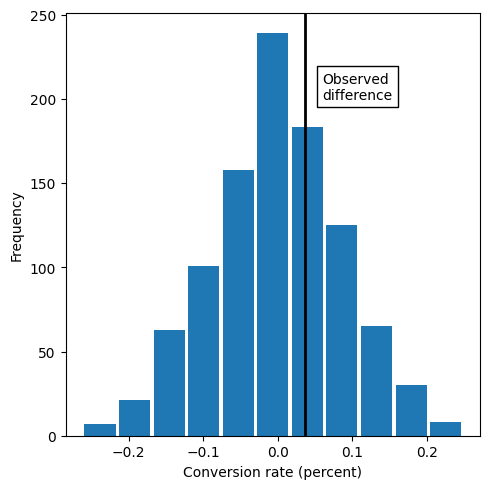

In [7]:
#Se crea un histograma de las diferencias de conversión resultantes de las permutaciones.
#Se agrega una línea vertical que representa la diferencia observada.
#Se muestra el histograma con etiquetas y límites ajustados.


fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Resultado

- La diferencia observada de 0.0368%
- Se observa que la diferencia observada está cercana al centro de la distribución y no en una de las colas, podría indicar que la diferencia observada es bastante común y podría haber ocurrido por azar (está dentro del rango de variación debida al azar). 
- Esto sugiere que la diferencia en las tasas de conversión entre los precios A y B podría ser explicada por variabilidad aleatoria y no necesariamente indica una diferencia significativa.
- Para que la diferencia observada sea considerada estadísticamente significativa, generalmente se busca que esté en una de las colas de la distribución, indicando que es poco probable que ocurra por azar y sugiriendo que hay algo real detrás de esa diferencia.

#### Observaciones


-  "porcentajes de conversión" se refieren a la proporción de personas que realizan una acción deseada (como realizar una compra) 
   en comparación con el total de personas que visitan una página web o participan en algún tipo de actividad.
-  "efectividad en términos de conversiones", se está hablando de qué precio o estrategia resulta en una mayor proporción de personas que realizan la acción deseada.
-  En el ejercicio se comparan dos precios (A y B) para ver cuál de ellos genera una tasa de conversión más alta, es decir, cuál es más efectivo para llevar a las personas a realizar la acción que se busca, como comprar un producto.

##### Uso de permutación

- Se usan permutaciones para evaluar si la diferencia observada en los porcentajes de conversión entre dos precios (A y B) es estadísticamente significativa o simplemente podría ocurrir por azar.
- El procedimiento de permutación es como simular la situación en la que no hay diferencia real entre los dos precios, y cualquier diferencia observada es simplemente el resultado del azar.
- En cada permutación, se calcula la diferencia en los porcentajes de conversión entre los dos precios, y estas diferencias conforman una distribución bajo la hipótesis nula de que no hay diferencia real.
- Luego, se compara la diferencia observada con la distribución permutada, y si la diferencia observada cae en una región rara de esta distribución, se podría considerar significativa, sugiriendo que la diferencia entre los precios A y B no es simplemente aleatoria.

#### Utilidad


- Nos ayuda a entender si la diferencia observada en los porcentajes de conversión entre los dos precios es realmente significativa o si podría haber ocurrido por casualidad.

## Valor p

#### Cálculo del Valor p a través de Permutaciones:

In [8]:
# perm_diffs        es una lista que contiene las diferencias permutadas entre los porcentajes de conversión de los precios A y B.
# El bucle [diff > obs_pct_diff for diff in perm_diffs] crea una lista de valores booleanos. Cada valor es True si la diferencia permutada es mayor que la diferencia observada (obs_pct_diff), y False en caso contrario.
# np.mean(...)      toma la lista de booleanos y calcula la proporción de True en la lista. Esto se logra sumando todos los True y dividiendo por el número total de elementos en la lista.
# np.mean(...)      se está utilizando para calcular la proporción de casos permutados donde la diferencia es mayor que la diferencia observada,   
# print, se muestra el valor p calculado a través de permutaciones, 

print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


##### Observación

Valores p:

- Valor p pequeño (p < 0.05): Si el valor p es menor que un umbral comúnmente utilizado de 0.05 (5%), se considera que los resultados son estadísticamente significativos. Esto sugiere que hay evidencia suficiente para rechazar la hipótesis nula.

- Valor p grande (p > 0.05): Si el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. En este caso, los resultados se consideran no estadísticamente significativos.

##### Resultado


- El valor 0.332 podría indicar que no hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia real entre los porcentajes de conversión de los precios A y B.

In [9]:

# survivors es una matriz que representa la frecuencia de conversiones y no conversiones para los precios A y B.

survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])

#realiza la prueba de chi-cuadrado de independencia en la tabla de contingencia survivors.
#chi2 contiene el estadístico de chi-cuadrado, p_value es el valor p asociado, df son los grados de libertad y _ almacena los valores esperados.

chi2, p_value, df, _ = stats.chi2_contingency(survivors)

# print, se muestra el valor p obtenido mediante la prueba de chi-cuadrado, dividido por 2
print(f'p-value for single sided test: {p_value / 2:.4f}')


p-value for single sided test: 0.3498


##### Resultado



-  El valor p es 0.3498, que es mayor que 0.05. 
- Esto podría llevar a la conclusión de que no hay suficiente evidencia para rechazar la hipótesis nula, y se podría decir que los datos no proporcionan una base sólida para afirmar que hay una diferencia significativa en la conversión entre los precios A y B según esta prueba específica.